### **Mục lục**
##### [**1. Giới thiệu**](#01)
##### [**2. Mục tiêu**](#02)
##### [**3. Thực hành**](#03)
* [Tiền xử lý](#3.1)
* [Thực hiện phân cụm](#3.2)
##### [**4. Kết luận**](#04)


<a id="01"><h3><strong>1. Giới thiệu</strong></h3></a>


Mục này nằm trong chương 3 thuộc bài tập cuối kỳ bộ môn Khai phá dữ liệu lớp DDU1231. Thực hiện với bộ dữ liệu đặt phòng khách sạn (Hotel Booking Demand) dữ liệu được thu thập trong giai đoạn năm 2015 - 2017 từ hai khách sạn một là từ khách sạn thành phố và một khách sạn nghỉ dưỡng cả hai đều nằm ở Bồ Đào Nha

* Sinh viên thực hiện: **Nguyễn Đăng Tiến (3123580050)**
* Nhật ký thực hiện các chương
  * Chương 1: Thực hiện ngày 10/12/2025
  * Chương 2: Thực hiện ngày 11/12/2025
  * Chương 3: Thực hiện ngày 11/12/2025
  * Chương 4: Thực hiện ngày 11/12/2025

<a id="02"><h3><strong>2. Mục tiêu</strong></h3></a>


Thực hiện giải quyết các câu hỏi đặt ra trong bài tiểu luận:
1. Có thể phân nhóm khách hàng dựa trên hành vi đặt phòng (thời gian đặt, ADR, số đêm lưu trú, loại phòng…) hay không?
2. Các nhóm khách hàng được hình thành có sự khác biệt đáng kể về hành vi chi tiêu hoặc khả năng hủy phòng không?

<a id="03"><h3><strong>3. Thực hành</strong></h3></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [4]:
df.shape

(119390, 32)

<a id="3.1"><h4><strong>3.1. Tiền xử lý</strong></h4></a>

#### **Mô tả các đặc trưng của bộ dữ liệu Hotel Booking Demand**
* **Đặc trưng về loại khách sạn**
  * `hotel` : Loại khách sạn: City Hotel hoặc Resort Hotel.
* **Đặc trưng về thời gian đặt phòng**
  * `is_canceled` : 1 = đặt phòng bị hủy, 0 = không hủy.
  * `lead_time` : Số ngày từ lúc đặt phòng đến ngày check-in.
  * `arrival_date_year` : Năm nhận phòng.
  * `arrival_date_month` : Tháng nhận phòng (January, February...).
  * `arrival_date_week_number` : Tuần trong năm (1–52).
  * `arrival_date_day_of_month` : Ngày trong tháng (1–31).
  * `stays_in_weekend_nights` : Số đêm lưu trú vào thứ 6–7.
  * `stays_in_week_nights` : Số đêm lưu trú vào các ngày trong tuần (Mon–Thu).
* **Đặc trưng về khách hàng**
  * `adults` : Số lượng người lớn.
  * `children` : Số lượng trẻ em.
  * `babies` : Số trẻ sơ sinh.
  * `meal` : Loại suất ăn (BB, HB, FB, SC…).
  * `country` : Quốc gia của khách (mã ISO).
  * `market_segment` : Phân khúc khách hàng (Online TA, Direct, Corporate…).
  * `distribution_channel` : Kênh phân phối (Direct, TA/TO…).
  * `is_repeated_guest` : 1 = khách quay lại, 0 = khách mới.
  * `previous_cancellations` : Số lần đặt trước đó bị hủy.
  * `previous_bookings_not_canceled` : Số đặt trước đó không bị hủy.
  * `reserved_room_type` : Loại phòng khách đặt.
  * `assigned_room_type` : Loại phòng được giao khi nhận phòng.
* **Đặc trưng về tài chính và giá phòng**
  * `booking_changes` : Số lần khách thay đổi đặt phòng.
  * `deposit_type` : Loại đặt cọc (No Deposit, Non Refund, Refundable).
  * `agent` : ID đại lý du lịch.
  * `company` : ID công ty (nếu đi theo đoàn công ty).
  * `adr` : Average Daily Rate: giá phòng trung bình mỗi đêm.
* **Đặc trưng về điều kiện đặt phòng**
  * `required_car_parking_spaces` : Số chỗ đỗ xe khách yêu cầu.
  * `total_of_special_requests` : Số yêu cầu đặc biệt (giường đôi, tầng cao…).
* **Đặc trưng về trạng thái đặt phòng**
  * `reservation_status` : Trạng thái: *Canceled*, *Check-Out*, *No-Show*.
  * `reservation_status_date` : Ngày ghi nhận trạng thái.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
# -----------------------------
# 1. Xử lý missing values
# -----------------------------
df['children'].fillna(df['children'].median(), inplace=True) # Thay thế bằng median
df['babies'].fillna(df['babies'].median(), inplace=True) # Thay thế bằng Median
df['country'].fillna(df['country'].mode()[0], inplace=True) # Thay thế bằng Mode

# -----------------------------
# 2. Loại bỏ dữ liệu không hợp lệ
# -----------------------------
df = df[(df['adults'] + df['children'] + df['babies']) > 0] # Loại bỏ phòng không có khách

# -----------------------------
# 3. Outlier Filtering
# -----------------------------
def filter_by_quantile(df, col, low=0.005, high=0.995):
    q_low = df[col].quantile(low)
    q_high = df[col].quantile(high)
    return df[df[col].between(q_low, q_high)]

for col in ['adr', 'lead_time', 'stays_in_week_nights', 'stays_in_weekend_nights',
            'children', 'babies', 'adults']:
    df = filter_by_quantile(df, col)

# -----------------------------
# 4. Feature Engineering
# -----------------------------

# Tổng số ngày lưu trú / tổng số khách
df['total_stay'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights'] # Tổng số đêm ở lại
df['total_guests'] = df['adults'] + df['children'] + df['babies'] # Tổng số khách

# Các biến dự báo mạnh
df['is_family_trip'] = (df['children'] + df['babies'] > 0).astype(int) # Chuyến đi gia đình hay không
df['has_previous'] = (df['previous_cancellations'] > 0).astype(int) # Có quay lại không
df['adr_per_guest'] = df['adr'] / df['total_guests'] # Gía phòng trung bình trên một người

# Phân nhóm lead time
df['lead_time_bucket'] = pd.cut(
    df['lead_time'],
    bins=[0, 30, 90, 180, 365, df['lead_time'].max()],
    labels=['0-30', '30-90', '90-180', '180-365', '365+'] # Nhóm đặt phòng trước
)

# Chuyển tháng sang số
df['arrival_month_num'] = pd.to_datetime(df['arrival_date_month'], format='%B').dt.month

# Tạo biến season
def get_season(month):
    if month in [12,1,2]: return 'Winter'
    if month in [3,4,5]: return 'Spring'
    if month in [6,7,8]: return 'Summer'
    return 'Fall'

df['season'] = df['arrival_month_num'].apply(get_season) # Mùa du lịch

# Tạo biến arrival weekday
df['arrival_date'] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + "-" +
    df['arrival_month_num'].astype(str) + "-" +
    df['arrival_date_day_of_month'].astype(str)
)
df['arrival_weekday'] = df['arrival_date'].dt.weekday # Ngày trong tháng

# Xóa cột arrival_date vì không dùng cho model
df.drop(['arrival_date'], axis=1, inplace=True)

# -------------------------------
# 5. Loại bỏ cột không cần thiết
# -------------------------------
df.drop([
    'reservation_status', # Tiết lộ trước thông tin khi huấn luyện
    'reservation_status_date',
    'assigned_room_type',
    'company',
    'agent'
], axis=1, inplace=True)

# -----------------------------
# 6. Tách dữ liệu
# -----------------------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Tách dữ liệu với tỉ lệ train/test 80 - 29
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [7]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numeric:", num_cols) # Xác định cột số
print("Categorical:", cat_cols) # Xác định cột phân loại

Numeric: ['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'total_stay', 'total_guests', 'is_family_trip', 'has_previous', 'adr_per_guest']
Categorical: ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type', 'lead_time_bucket', 'season']


<a id="3.2"><h4><strong>3.2. Thực hiện phân cụm</strong></h4></a>

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score

# -----------------------------
# 1. Chọn đặc trưng để phân cụm
# -----------------------------
cluster_features = [
    'lead_time',
    'total_stay',
    'adr_per_guest',
    'total_guests',
    'season',
    'market_segment',
    'customer_type',
    'total_of_special_requests',
]

cluster_features = [c for c in cluster_features if c in df.columns]
X_cluster = df[cluster_features].copy()

# --------------------
# 2. Khai báo kiểu cột
# --------------------
numeric_features = [c for c in cluster_features if pd.api.types.is_numeric_dtype(X_cluster[c])]
categorical_features = [c for c in cluster_features if c not in numeric_features]

# -----------------------------
# 3. Tiền xử lý: OneHot + Scale
#    - GIỮ SPARSE để nhanh hơn (không ép dense)
# -----------------------------
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(with_mean=True, with_std=True), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ],
    remainder="drop"
)

# ------------------------------
# 4. Hàm chọn K nhanh bằng Silhouette (sampling)
# ------------------------------
def find_best_k(
    X,
    k_values=range(3, 8),
    random_state=42,
    pca_var=0.85,
    sample_size=8000,
    use_minibatch=True
):
    results = []
    best_k, best_score = None, -1

    # Fit preprocess + PCA 1 lần
    X_prep = preprocess.fit_transform(X)

    pca = PCA(
        n_components=pca_var,
        random_state=random_state
    )
    X_pca = pca.fit_transform(X_prep)

    n = X_pca.shape[0]
    ss = min(sample_size, n)

    for k in k_values:
        if use_minibatch:
            model = MiniBatchKMeans(
                n_clusters=k,
                batch_size=4096,
                n_init=10,
                random_state=random_state
            )
        else:
            model = KMeans(
                n_clusters=k,
                n_init=20,
                max_iter=300,
                random_state=random_state,
                algorithm="lloyd"
            )

        labels = model.fit_predict(X_pca)

        score = silhouette_score(
            X_pca, labels,
            sample_size=ss,
            random_state=random_state
        )

        results.append({"k": k, "silhouette": score})

        if score > best_score:
            best_k, best_score = k, score

    return pd.DataFrame(results).sort_values("k"), best_k, best_score

# -----------------
# 5. Tìm K tốt nhất
# -----------------
sil_table, best_k, best_sil = find_best_k(
    X_cluster,
    k_values=range(3, 8),
    random_state=42,
    pca_var=0.85,
    sample_size=8000,
    use_minibatch=True
)

print("Silhouette table:\n", sil_table)
print(f"\nBest K = {best_k} | Best silhouette = {best_sil:.4f}")

# --------------------------------
# 6. Pipeline clustering cuối cùng
# --------------------------------
cluster_model = MiniBatchKMeans(
    n_clusters=best_k,
    batch_size=4096,
    n_init=10,
    random_state=42
)

cluster_pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("pca", PCA(n_components=0.85, random_state=42)),
    ("kmeans", cluster_model)
])

df["cluster"] = cluster_pipe.fit_predict(X_cluster)

# ------------------------------------------------
# 7. Profiling: mô tả cụm theo các feature đã dùng
# ------------------------------------------------
print("\n=== Cluster Size ===")
print(df["cluster"].value_counts().sort_index())

print("\n=== Cluster profiling (numeric mean) ===")
if numeric_features:
    num_profile = df.groupby("cluster")[numeric_features].mean().round(3)
    print(num_profile)

print("\n=== Cluster profiling (categorical mode) ===")
for c in categorical_features:
    mode_by_cluster = df.groupby("cluster")[c].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
    print(f"\n{c} mode by cluster:")
    print(mode_by_cluster)


Silhouette table:
    k  silhouette
0  3    0.173656
1  4    0.183652
2  5    0.199414
3  6    0.178147
4  7    0.180219

Best K = 5 | Best silhouette = 0.1994

=== Cluster Size ===
cluster
0    16936
1    17824
2    37007
3    14580
4    30895
Name: count, dtype: int64

=== Cluster profiling (numeric mean) ===
         lead_time  total_stay  adr_per_guest  total_guests  \
cluster                                                       
0          283.596       2.930         44.369         1.941   
1           54.915       2.471         98.971         1.122   
2           56.770       2.655         43.367         2.053   
3          141.678       7.800         50.683         2.227   
4           65.024       2.858         51.053         2.212   

         total_of_special_requests  
cluster                             
0                            0.177  
1                            0.311  
2                            0.048  
3                            0.737  
4                      

Bộ dữ liệu sau khi tiền xử lý bao gồm:
* Các biến số đã được chuẩn hóa
* Các biến phân loại được One-Hot Encoding, dẫn đến không gian đặc trưng có số chiều rất lớn
Trong không gian nhiều chiều:
Khoảng cách Euclidean trở nên kém ổn định
Silhouette Score có thể bị nhiễu bởi các chiều ít thông tin

**Do đó, PCA được sử dụng để giảm chiều dữ liệu, giữ lại các thành phần chính có phương sai lớn nhất.**

* PCA được cấu hình để giữ lại 85% tổng phương sai
* Silhouette Score được tính trên không gian PCA, thay vì không gian gốc

Cách làm này giúp

* Giảm nhiễu do chiều cao sau One-Hot Encoding
* Đảm bảo khoảng cách giữa các điểm phản ánh tốt hơn cấu trúc tiềm ẩn của dữ liệu
* Tăng tính ổn định và khả năng so sánh giữa các giá trị k

In [12]:
df.groupby("cluster")["is_canceled"].mean().round(3)

,is_canceled
cluster,
0,0.616
1,0.339
2,0.402
3,0.355
4,0.213


Tỷ lệ hủy phòng khác nhau giữa các cụm cho thấy:
* Các nhóm khách hàng  có mức độ rủi ro hủy phòng khác nhau
* Phân cụm đã khám phá được sự khác biệt hành vi có ý nghĩa thực tiễn

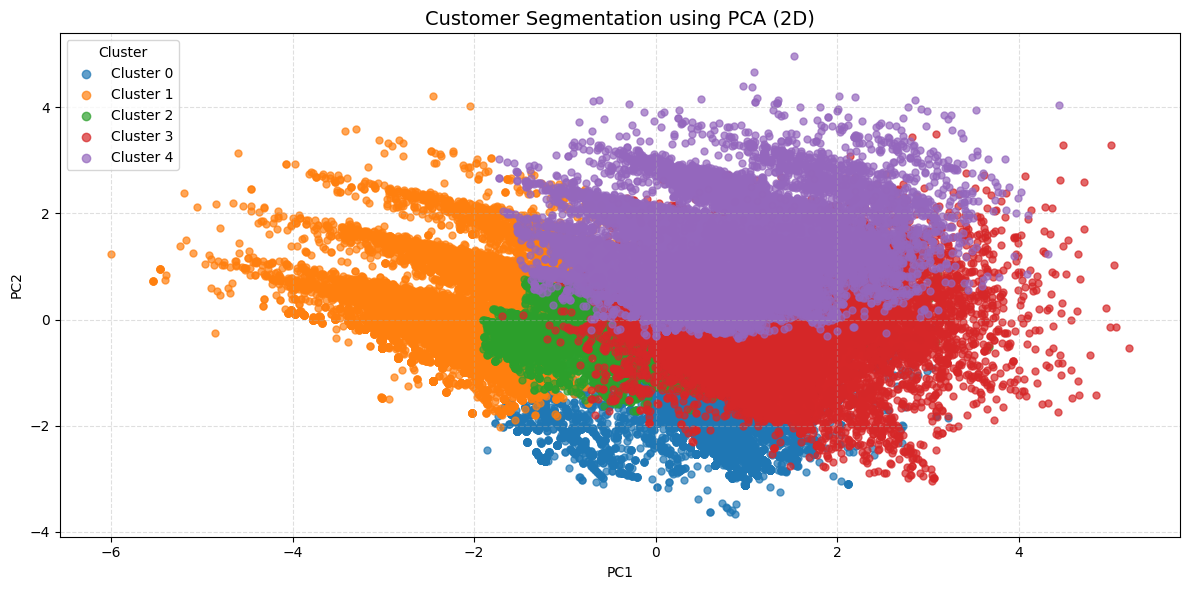

In [10]:
# Transform lại dữ liệu qua pipeline đã fit
X_prep = cluster_pipe.named_steps["preprocess"].transform(X_cluster)
X_pca  = cluster_pipe.named_steps["pca"].transform(X_prep)

# Gắn PCA vào dataframe
df_plot = df.copy()
df_plot["PC1"] = X_pca[:, 0]
df_plot["PC2"] = X_pca[:, 1]

# Lấy danh sách cluster
clusters = sorted(df_plot["cluster"].unique())

# Tạo figure
plt.figure(figsize=(12, 6))

# Vẽ từng cluster để có legend rõ ràng
for c in clusters:
    subset = df_plot[df_plot["cluster"] == c]
    plt.scatter(
        subset["PC1"],
        subset["PC2"],
        s=25,
        alpha=0.7,
        label=f"Cluster {c}"
    )

# Trang trí biểu đồ
plt.title("Customer Segmentation using PCA (2D)", fontsize=14)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster", markerscale=1.2)
plt.grid(True, linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()

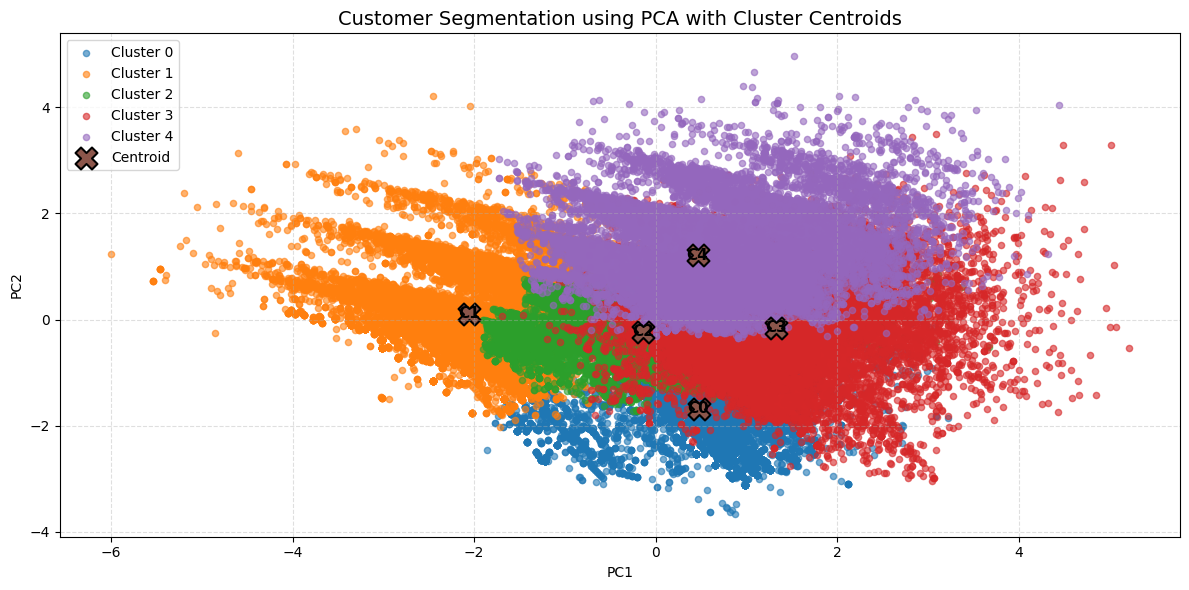

In [11]:
# Tính centroid trong không gian PCA
centroids_pca = (
    df_plot
    .groupby("cluster")[["PC1", "PC2"]]
    .mean()
)

clusters = sorted(df_plot["cluster"].unique())

plt.figure(figsize=(12, 6))

# Vẽ các điểm dữ liệu
for c in clusters:
    subset = df_plot[df_plot["cluster"] == c]
    plt.scatter(
        subset["PC1"],
        subset["PC2"],
        s=20,
        alpha=0.6,
        label=f"Cluster {c}"
    )

# Vẽ tâm cụm (centroid)
plt.scatter(
    centroids_pca["PC1"],
    centroids_pca["PC2"],
    s=250,
    marker="X",
    edgecolor="black",
    linewidth=1.5,
    label="Centroid"
)

# Ghi nhãn cho tâm cụm
for c, row in centroids_pca.iterrows():
    plt.text(
        row["PC1"],
        row["PC2"],
        f"C{c}",
        fontsize=11,
        weight="bold",
        ha="center",
        va="center"
    )

# Trang trí
plt.title("Customer Segmentation using PCA with Cluster Centroids", fontsize=14)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()

<a id="04"><h3><strong>4. Kết luận</strong></h3></a>


1. Đánh giả băng Silhouetete Score cho thấy rằng với số k = 6 thì việc thực hiện phân cụm là ổn định nhất (Do hạn chế của thiết bị thực hiện huấn luyện mà tác giả đã sử dụng MiniKmeans thay thế tuy nhiên kết quả cũng không thay đổi)
  * Giá trị **0.2** không được xem là quá tốt tuy nhiên ta phải hiểu đây chính là dữ liệu thực tế và hoàn toàn chấp nhận được về hanh vi khách hàng (do con người luôn diễn ra và thay đổi liên tục dễ hiểu khi cụm ta phân loại cũng sẽ bị chồng lẫn)
  * Với giá trị như trên phân cụm chỉ hợp lý để phân tích hành vi và cũng không được xem là tiêu chí để phân loại
2. Kích thước các cụm có thể quan sát trên bảng
  * Không có cụm nảo nhỏ, phân bố tương đối cân bằng
3. Phân bố về các đặc trưng
* *Số*
  * **Cụm 0:** Khách ngắn hạn ít yêu cầu (Khách lên kế hoạch rất sớm nhưng chi tiêu thấp ) -
    * `Lead_time`: 284 ngày
    * `Total_stay`: 2.9 đêm
    * `adr_per_guest`: 44
    * `total_guests`: xáp xỉ 2
    * `total_of_special_requests`: 0.18
  * **Cụm 1:** Khách ngắn hạn ít yêu cầu (Khách đi một mình - giá cao - ở ngắn )
    * `Lead_time`: 55 ngày
    * `Total_stay`: 2.5 đêm
    * `adr_per_guest`: 99
    * `total_guests`: 1.1
    * `total_of_special_requests`: 0.31
  * **Cụm 2:** Khách ngắn hạn ít yêu cầu (Khách đại trà - ít yêu cầu - giá thấp )
    * `Lead_time`: 56 ngày
    * `Total_stay`: 2.7 đêm
    * `adr_per_guest`: 43
    * `total_guests`: 2
    * `total_of_special_requests`: 0.04
  * **Cụm 3:** Khách ngắn hạn ít yêu cầu (Khách ở dài ngày - có kế hoặc - có yêu cầu )
    * `Lead_time`: 142 ngày
    * `Total_stay`: 7.8 đêm
    * `adr_per_guest`: 51
    * `total_guests`: 2.2
    * `total_of_special_requests`: 0.74  
  * **Cụm 4:** Khách ngắn hạn ít yêu cầu ( Khách đi nhóm/gia đình - nhiều yêu cầu )
    * `Lead_time`: 65 ngày
    * `Total_stay`: 2.9
    * `adr_per_guest`: 51
    * `total_guests`: 2.2
    * `total_of_special_requests`: 1.49
* *Phân loại*
  * `Summer` chiếm ưu thế như ở Cụm 1 và Cụm 2 lại có chút khác biệt điều này cho thấy không phải mùa quyết định việc ta phân cụm nhưng chúng vẫn có vai trò điều tiết hành vi đặt phòng
  * **Cụm 0** là cụm duy nhất thuộc Groups điều này cho thấy đây là khách đặt từ rất sớm, giá thấp và đàm phán trước
  * `customer_type` không hề đóng vai trò trong việc phân cụm do đó ta có thể loại bỏ